In [10]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:86% !important;}
div.cell.code_cell.rendered{width:100%;}
div.CodeMirror {font-family:Consolas; font-size:15pt;}
div.output {font-size:15pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:15pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:5px;}
table.dataframe{font-size:15px;}
</style>
"""))

In [34]:
import numpy as np
import pandas as pd
import sys
from tensorflow.keras.utils import to_categorical  # 원핫인코딩
from tensorflow.keras.models import Sequential, save_model, load_model
from tensorflow.keras.layers import Dense, Input, Dropout 
from matplotlib import pyplot as plt # 학습 과정 그래프 
from sklearn.metrics import confusion_matrix # 혼동행렬
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split # 데이터 분리
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

## 데이터 확보 밑 전처리

In [35]:
# 데이터 읽어오기
df = pd.read_csv('data/winequality-red.csv', sep=';')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [36]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [37]:

x = df.iloc[:, :-1].values
y = df.iloc[:, -1:].values
x.shape, y.shape


((1599, 11), (1599, 1))

In [38]:
scaler = MinMaxScaler()
scaled_x = scaler.fit_transform(x)
scaled_x[:2]

array([[0.24778761, 0.39726027, 0.        , 0.06849315, 0.10684474,
        0.14084507, 0.09893993, 0.56754772, 0.60629921, 0.13772455,
        0.15384615],
       [0.28318584, 0.52054795, 0.        , 0.11643836, 0.14357262,
        0.33802817, 0.2155477 , 0.49412628, 0.36220472, 0.20958084,
        0.21538462]])

In [39]:
Y= to_categorical(y)
Y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [40]:
x_train, x_test, y_train, y_test = train_test_split(scaled_x,
                                                   Y,
                                                   test_size=0.3, # 테스트셋비율
                                                   random_state=7,
                                                   stratify=y # 층화추출
                                                   )
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1119, 11), (480, 11), (1119, 9), (480, 9))

In [46]:

x = df.iloc[:, :-1].values
y = df.iloc[:, -1:].values
x.shape, y.shape

scaler = MinMaxScaler()
scaled_x = scaler.fit_transform(x)
scaled_x[:2]
Y= to_categorical(y)
Y
x_train, x_test, y_train, y_test = train_test_split(scaled_x,
                                                   Y,
                                                   test_size=0.3, # 테스트셋비율
                                                   random_state=7,
                                                   stratify=y # 층화추출
                                                   )
x_train.shape, x_test.shape, y_train.shape, y_test.shape


model = Sequential()
model.add(Dense(units=64, input_dim=11, activation='relu'))  
model.add(Dense(units=1064, activation='relu')) 
model.add(Dropout(0.3))
model.add(Dense(units=562, activation='relu'))       
model.add(Dropout(0.3))
model.add(Dense(units=216, activation='relu'))       
model.add(Dropout(0.3))
model.add(Dense(units=9, activation='softmax'))            



model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

earlystopping = EarlyStopping(monitor='accuracy', patience=50)

hist = model.fit(x_train, y_train,
                 epochs=500,
                 batch_size=100,
                 verbose=1,
                 callbacks=[earlystopping])


Epoch 1/500
12/12 [==============================] - 1s 11ms/step - loss: 1.5916 - accuracy: 0.4138
Epoch 2/500
12/12 [==============================] - 0s 10ms/step - loss: 1.1863 - accuracy: 0.4906
Epoch 3/500
12/12 [==============================] - 0s 10ms/step - loss: 1.1069 - accuracy: 0.5192
Epoch 4/500
12/12 [==============================] - 0s 11ms/step - loss: 1.0777 - accuracy: 0.5433
Epoch 5/500
12/12 [==============================] - 0s 10ms/step - loss: 1.0361 - accuracy: 0.5576
Epoch 6/500
12/12 [==============================] - 0s 11ms/step - loss: 1.0160 - accuracy: 0.5728
Epoch 7/500
12/12 [==============================] - 0s 11ms/step - loss: 1.0230 - accuracy: 0.5746
Epoch 8/500
12/12 [==============================] - 0s 11ms/step - loss: 1.0107 - accuracy: 0.5576
Epoch 9/500
12/12 [==============================] - 0s 10ms/step - loss: 0.9822 - accuracy: 0.5764
Epoch 10/500
12/12 [==============================] - 0s 10ms/step - loss: 0.9740 - accuracy: 0.5871

12/12 [==============================] - 0s 11ms/step - loss: 0.6495 - accuracy: 0.7140
Epoch 83/500
12/12 [==============================] - 0s 11ms/step - loss: 0.6503 - accuracy: 0.7265
Epoch 84/500
12/12 [==============================] - 0s 12ms/step - loss: 0.6506 - accuracy: 0.7239
Epoch 85/500
12/12 [==============================] - 0s 11ms/step - loss: 0.6875 - accuracy: 0.7096
Epoch 86/500
12/12 [==============================] - 0s 11ms/step - loss: 0.6676 - accuracy: 0.7158
Epoch 87/500
12/12 [==============================] - 0s 11ms/step - loss: 0.6513 - accuracy: 0.7283
Epoch 88/500
12/12 [==============================] - 0s 12ms/step - loss: 0.6348 - accuracy: 0.7203
Epoch 89/500
12/12 [==============================] - 0s 12ms/step - loss: 0.6204 - accuracy: 0.7310
Epoch 90/500
12/12 [==============================] - 0s 11ms/step - loss: 0.6017 - accuracy: 0.7453
Epoch 91/500
12/12 [==============================] - 0s 12ms/step - loss: 0.6351 - accuracy: 0.7158
Epo

12/12 [==============================] - 0s 11ms/step - loss: 0.3555 - accuracy: 0.8633
Epoch 163/500
12/12 [==============================] - 0s 12ms/step - loss: 0.3197 - accuracy: 0.8668
Epoch 164/500
12/12 [==============================] - 0s 10ms/step - loss: 0.2948 - accuracy: 0.8892
Epoch 165/500
12/12 [==============================] - 0s 10ms/step - loss: 0.3104 - accuracy: 0.8829
Epoch 166/500
12/12 [==============================] - 0s 10ms/step - loss: 0.2869 - accuracy: 0.8856
Epoch 167/500
12/12 [==============================] - 0s 10ms/step - loss: 0.2896 - accuracy: 0.8811
Epoch 168/500
12/12 [==============================] - 0s 11ms/step - loss: 0.2778 - accuracy: 0.8883
Epoch 169/500
12/12 [==============================] - 0s 11ms/step - loss: 0.2892 - accuracy: 0.8892
Epoch 170/500
12/12 [==============================] - 0s 12ms/step - loss: 0.2710 - accuracy: 0.8928
Epoch 171/500
12/12 [==============================] - 0s 12ms/step - loss: 0.2743 - accuracy: 0

12/12 [==============================] - 0s 12ms/step - loss: 0.1339 - accuracy: 0.9553
Epoch 243/500
12/12 [==============================] - 0s 11ms/step - loss: 0.1474 - accuracy: 0.9428
Epoch 244/500
12/12 [==============================] - 0s 10ms/step - loss: 0.1325 - accuracy: 0.9491
Epoch 245/500
12/12 [==============================] - 0s 10ms/step - loss: 0.1259 - accuracy: 0.9482
Epoch 246/500
12/12 [==============================] - 0s 10ms/step - loss: 0.1229 - accuracy: 0.9544
Epoch 247/500
12/12 [==============================] - 0s 10ms/step - loss: 0.1157 - accuracy: 0.9589
Epoch 248/500
12/12 [==============================] - 0s 11ms/step - loss: 0.1503 - accuracy: 0.9473
Epoch 249/500
12/12 [==============================] - 0s 10ms/step - loss: 0.1854 - accuracy: 0.9312
Epoch 250/500
12/12 [==============================] - 0s 10ms/step - loss: 0.1329 - accuracy: 0.9562
Epoch 251/500
12/12 [==============================] - 0s 10ms/step - loss: 0.1084 - accuracy: 0

12/12 [==============================] - 0s 11ms/step - loss: 0.0518 - accuracy: 0.9821
Epoch 323/500
12/12 [==============================] - 0s 11ms/step - loss: 0.0432 - accuracy: 0.9911
Epoch 324/500
12/12 [==============================] - 0s 12ms/step - loss: 0.0352 - accuracy: 0.9884
Epoch 325/500
12/12 [==============================] - 0s 11ms/step - loss: 0.0686 - accuracy: 0.9821
Epoch 326/500
12/12 [==============================] - 0s 11ms/step - loss: 0.0769 - accuracy: 0.9741
Epoch 327/500
12/12 [==============================] - 0s 12ms/step - loss: 0.0567 - accuracy: 0.9830
Epoch 328/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0612 - accuracy: 0.9723
Epoch 329/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0490 - accuracy: 0.9857
Epoch 330/500
12/12 [==============================] - 0s 11ms/step - loss: 0.0383 - accuracy: 0.9893
Epoch 331/500
12/12 [==============================] - 0s 12ms/step - loss: 0.0898 - accuracy: 0

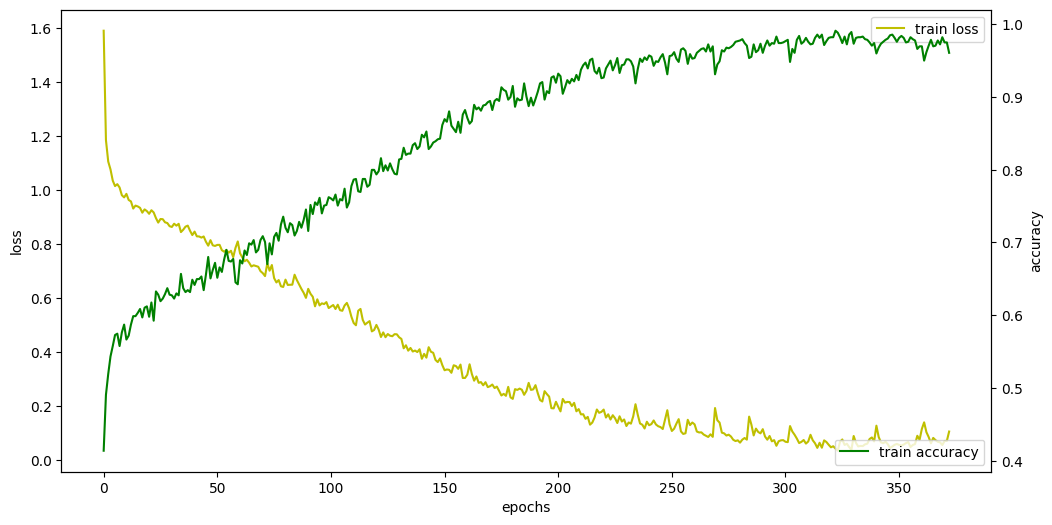

In [47]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots(figsize=(12,6))


loss_ax.plot(hist.history['loss'], 'y', label='train loss')



#
acc_ax = loss_ax.twinx()
acc_ax.plot(hist.history['accuracy'], 'g', label='train accuracy')


loss_ax.set_xlabel('epochs')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='upper right')
acc_ax.legend(loc='lower right')


plt.show()


In [49]:
# 모델 평가
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=100)
print(loss_and_metrics[0])
print(loss_and_metrics[1])

5/5 [==============================] - 0s 4ms/step - loss: 3.0570 - accuracy: 0.6104
3.0569963455200195
0.6104166507720947


In [50]:
model.save('model/practice3.h5')
save_model(model, 'model/practice3.h5')